# Experiment board simulation

---
## Objectives
- Simulate behaviour of circuit to design it.
- Verify that the designed circuit perform as expected.
---

## Simulation flow chart

1. Generate input signal
2. Simulate with ltspice first part (up to filter) and output simulation
3. Simulate filter in python
4. 


In [15]:
##################### Importations #####################
# Project librairies
import simulation_fct as f
# Standards librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import *
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

In [16]:
######################## PATHS ########################
path_stimuli = "Simulation_signals/Stimuli/"   # Export stimuli from python here
path_output = "Simulation_signals/Outputs/"    # Import simulation results from here

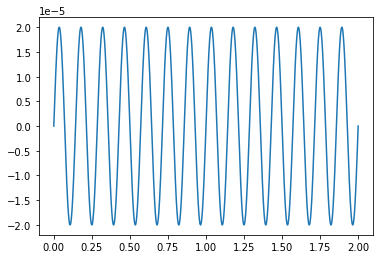

In [17]:
#################### Pure sine wave ###################
signal_name = "sine_7_20u"                        # Signal name for txt output
sine_7 = f.sine_generator(7,20E-6,2,10E-4)
plt.plot(sine_7[:,0], sine_7[:,1])
np.savetxt(path_stimuli+signal_name+".txt", sine_7 ) # Save sine wave to txt file


In [18]:
# ################### Sum of sines wave ##################

# signal_name = "sum_sine_1"                            # Signal name for txt output
# sines_freq = [7,14,21,28]                             # Sines frequencies
# sines_amp  = [20E-6,20E-6,20E-6,20E-6]                # Sines amplitudes
# sum_sine_1 = f.multi_sine_generator(sines_freq,sines_amp,2,10E-6) 
# plt.plot(sum_sine_1[:,0], sum_sine_1[:,1])
# print(np.shape(sum_sine_1))
# #np.savetxt(path_stimuli+signal_name+".txt", signal1 ) # Save sine wave to txt file

In [19]:
########################## FFT #########################
# N=int(2/10E-6)
# yf = fft(signal1[:,1])
# xf = fftfreq(N, 10E-6)[:N//2]
# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# plt.xlim((-1,50))
# plt.show()

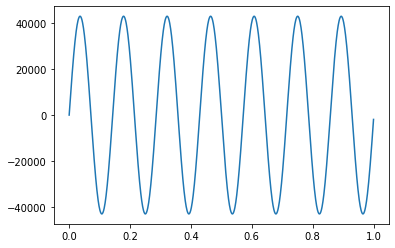

In [21]:
################## Read LTSpice output #################
signal_lt = f.read_ltspice_wav(path_output+'out_preamp.wav', 32, 2)
plt.plot(signal_lt[:,0], signal_lt[:,1])

## Ressources